Ridge regression
---

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('data-points.csv')

# Print shape
print('Shape:', data_df.shape)

# First five rows
data_df.head()

Shape: (50, 2)


,x,y
0,0.000,0.706
1,0.128,0.288
2,0.256,0.645
3,0.385,1.272
4,0.513,1.238


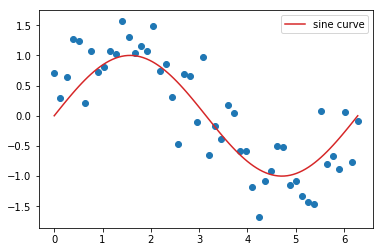

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Extract x, y data
x = data_df.x.values
y = data_df.y.values

# Plot data points
plt.scatter(x, y)

# Plot sine curve for reference
x_values = np.linspace(min(x), max(x), num=100)
y_sine = np.sin(x_values)
plt.plot(x_values, y_sine, c='C3', label='sine curve')
plt.legend()
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

print('Shape:', X_poly.shape)
print('Features:', poly_obj.get_feature_names())

Shape: (50, 10)
Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_poly)

In [10]:
X_rescaled.mean(axis=0)

array([ 1.06581410e-16,  3.10862447e-16, -2.66453526e-16, -9.76996262e-17,
       -1.33226763e-16,  6.21724894e-17, -6.21724894e-17,  1.33226763e-16,
       -5.32907052e-17, -5.32907052e-17])

In [13]:
X_rescaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

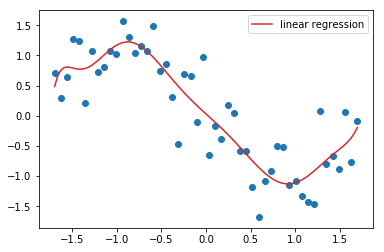

In [14]:
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_rescaled, y)

# Pass sample x values through the preprocessing steps
X_values_rescaled = scaler.transform(
    poly_obj.transform(x_values[:, np.newaxis])
)
y_values_lr = lr.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lr, c='C3', label='linear regression')
plt.legend()
plt.show()

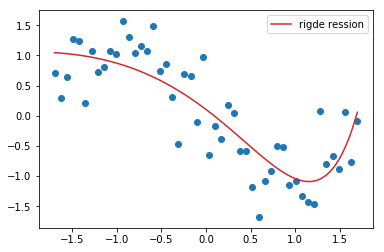

In [15]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X_rescaled, y)

# Compute predictions
y_values_ridge = ridge.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge, c='C3', label='rigde ression')
plt.legend()
plt.show()

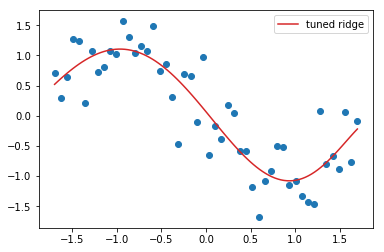

In [16]:
# Ridge regression
ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_rescaled, y)

# Compute predictions
y_values_ridge2 = ridge2.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge2, c='C3', label='tuned ridge')
plt.legend()
plt.show()

In [17]:
# Linear regression coefficients
features = poly_obj.get_feature_names()
for feature, coef in zip(features, lr.coef_):
    print('{:<6}: {:>10.1f}'.format(feature, coef))

x0    :        6.3
x0^2  :     -156.5
x0^3  :     1604.8
x0^4  :    -8250.8
x0^5  :    24145.5
x0^6  :   -42951.3
x0^7  :    47245.0
x0^8  :   -31285.6
x0^9  :    11373.1
x0^10 :    -1731.0


In [18]:
# Ridge regression coefficients
for feature, coef in zip(features, ridge2.coef_):
    print('{:<6}: {:>4.1f}'.format(feature, coef))

x0    :  1.4
x0^2  : -1.6
x0^3  : -6.8
x0^4  :  3.9
x0^5  :  4.5
x0^6  :  0.5
x0^7  : -1.7
x0^8  : -1.1
x0^9  :  0.2
x0^10 :  0.1


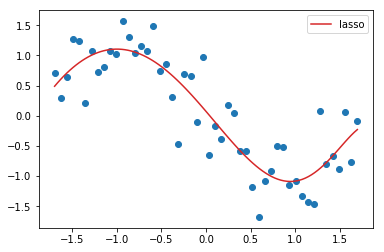

In [19]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=1e-4, max_iter=1e5)
lasso.fit(X_rescaled, y)

# Compute predictions
y_values_lasso = lasso.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lasso, c='C3', label='lasso')
plt.legend()
plt.show()

In [20]:
# Lasso regression coefficients
for feature, coef in zip(features, lasso.coef_):
    print('{:<6}: {:>4.1f}'.format(feature, coef))

x0    :  1.8
x0^2  : -4.4
x0^3  : -0.2
x0^4  :  0.0
x0^5  :  2.2
x0^6  :  0.9
x0^7  :  0.0
x0^8  :  0.0
x0^9  : -0.0
x0^10 : -0.7
